# Getting Help from Yelp: Understanding Socioeconomics through Restaurant Popularity and Consumer Spending Habits

## Frances Ingram-Bate, Nathaniel Linden, Parker Grosjean, Diana Reiman

## Summary of Research Questions
We aim to explore the interactions between restaurant pricing, household income, and housing cost across different areas in a city. To do so, we will be focusing on the cities Las Vegas, Nevada, and Phoenix, Arizona. The cities will be split into areas by zip code; restaurant pricing will be determined by the average restaurant price within a zip code from Yelp review data, household income will be determined from average household income per zip code from IRS tax return data, and housing cost will be determined by the average value of housing per zip code from the Zillow Zestimate. Initially, we will focus on Las Vegas to examine the following questions:

- Are there any trends across zip code areas concerning restaurant pricing, household income, and housing cost? 

    - To examine this question, we will calculate Pearson’s correlation coefficient between the different variables, and will visually examine the scatterplots of the variables to determine whether collinearity or an interaction are present in the data. In answering this question we will examine the following:

        - What is the correlation between average restaurant price point and average household income?
        - What is the correlation between average restaurant price point and median house value?
        - What is the correlation between average household income and median house value?
        
- Can we predict average restaurant pricing in a zip code area from median house value and average household income? 
    - In examining this question, we will develop regression models for average restaurant pricing based on the variables median house value and average household income. 

- Does restaurant star rating across price point level vary for different zip code areas? What are trends in such variance across zip code areas and how does it relate to socioeconomic factors such as median house value and average household income?
    
- (Given we finish other analysis with extra time) Can we develop a machine learning model to predict the best market (zip code) to open a restaurant at a given price point? 
    - In examining this question we will develop a machine learning estimator using the TensorFlow API. See our methodology section to see the implementation plan.


## Motivation and Background
Consumer buying power is an important metric used by businesses to represent their ability to succeed at a price point in a given marketplace. Thus, having a proxy for consumer buying power is critical for establishing business success strategies, as well as understanding social and class spending habits. A Consumer Price Index (CPI) is a measure of the change in prices consumers pay for a set basket of goods, which is the most commonly used proxy for understanding consumer buying power in a marketplace. However, the CPI lacks the ability to distinguish subtle differences in buying power of consumers in varying socioeconomic classes. Hence, our project seeks to understand how consumers of higher socioeconomic classes versus lower socioeconomic classes rate goods at a certain price point. Our project uses food from restaurants as a proxy for a basket of goods, which is a limitation to this analysis. However, restaurants are included as one of the goods in the basket that is used to establish the overall CPI, so our analysis is useful when combined with the sub CPI that only includes restaurants. For economic class we are using a predicted median housing price index (Zestimate), average income, and the proportion of individuals in certain income ‘bins’ as specified by the IRS. This analysis will allow insight into how consumers view purchasing of goods at certain price points based on the socioeconomic standing within a zip code of interest. This will provide useful insight to add to the CPI in estimating whether a business has the ability to succeed in a marketplace at a given price point. Thus, this analysis is worth computing as it will offer business insights, specifically for restaurants regarding their ability to succeed at a price point in marketplaces defined by zip code.


## Dataset
Our analysis will utilize 3 datasets including, the Yelp Open Dataset (1), a Nevada IRS Tax Return Summary (2), and the Zillow Home Value Index Summary (3). These data sets all provide us with zip code level information in the socioeconomics of individuals living in the city of interest. In order to analyze the data we have written python scripts to parse through the files and create simplified data structures containing the attributes we will analyze. Examples of each dataset can be found in figure 1 (Note: Some of these datasets contain 100,000s of rows of data, for display purposes we have only included the first few rows).


URLS for Data: 

https://www.yelp.com/dataset/ 

https://www.zillow.com/research/data/ 

https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi


## Methodology (Algorithm or Analysis)
For each of the research questions the following will outline the methodology we plan to use to complete our analyses. 

- Are there any trends across zip code areas concerning restaurant pricing, household income, and housing cost?

    - The first analysis to be completed under this research question is to compute the correlation between average restaurant price point and average household income. First, we will obtain the dataset of just restaurants from the Yelp dataset using set intersections. Then, we will ‘bin’ the restaurants based on zip codes in Las Vegas, NV and Phoenix, AZ by placing them in a dictionary where the zip code is the key and lists of restaurants are the values. Then, the average price point per zip code will be calculated from the Yelp dataset. Next, the average household income will be calculated from the IRS dataset by summing all household incomes and dividing by the number of tax returns per zip code. A Pearson’s correlation coefficient between mean household income and average price point will then be calculated, where each zipcode is a datapoint. The Pearson’s correlation coefficients will calculated per city.
    - The second analysis under this research question is the correlation between median house value estimate (Zestimate from Zillow) and average restaurant price point. The Zestimates for Las Vegas, NV and Phoenix, AZ will be extracted from the zillow dataset clustered by zip code. The Pearson’s correlation coefficient between the median house value estimate and the average restaurant price point will then be calculated, where each zip code is a datapoint. The Pearson’s correlation coefficients will be calculated per city.
    - The third analysis will be calculating the Pearson’s correlation coefficient between median house value and average income, where each zip code is a datapoint. The coefficients will be calculate per city.
        
- Can we predict average restaurant pricing in a zip code area from median house value and average household income?

    - The sklearn library will be used to generate regression models between median house value and average restaurant price point, as well as between average household income and average restaurant price point. The exact models generated the models will depend on the distribution of zip codes in the scatter plots generated from the analysis of our first research question. Most likely, we will perform a linear multiple regression, and some non-linear regression. 
        
- Does restaurant star rating across price point level vary for different zip code areas? What are trends in such variance across zip code areas and how does it relate to socioeconomic factors such as median house value and average household income?

    - To explore this question, we will separate restaurant price point level into the four bins given by the dollar sign rating from Yelp data. Next we will compare compare the star rating (quality rating) of restaurants within each price bin. This will be done for each zip code area, by computing a 4-way ANOVA or similar statistical testing. This statistical test will allow us to determine if the average star rating of restaurants varies by bins. We will complete the same statistical testing for a summary of the city as a whole, to see if there were similar differences in the city in general to individual zip code areas. We will then characterize the zip code areas into different groups based on whether certain price point bins are weighted more highly, i.e. having one group where price point 1 has a statistically significant higher star rating than the other categories. Lastly we will then look for trends within these weighted groups, by computing the average of median house values and the average of average household income for the group, and comparing these averages to the other weighted groups. This question is important in that it allows us to compare the popularity of different restaurant price points in the different zip code areas, which will allow for analysis of the interplay of socioeconomic class, assuming that the socioeconomic class differs by zip code area, with popularity of restaurant price points.

- (Given we finish other analysis with extra time) Can we develop a machine learning model to predict the best market (zip code) to open a restaurant at a given price point?
 
    - In examining this question we will use machine learning to develop a predictor using the TensorFlow API. This predictor will combine multiple fully connected dense layers with ReLU activation functions where the logits from the final dense layer will be given to the softmax function, where cross entropy loss will be calculated and backpropagation will be implemented. Each price point (dollar sign rating on yelp) will be a class, which will thus be the labels of the dataset. We will use Zestimate Index Value and mean income as the features to feed into our classifier. The estimator will be developed and saved by creating a function that includes the TensorFlow layers. This estimator will then be trained with 70 percent of a new dataset generated from the data analysis for the first three research questions, which will label price points with zip codes based on star ratings. After the estimator has been trained, we will calculate its accuracy rate using the accuracy function from TensorFlow’s metrics package.


## Work Plan 
Our analysis will be performed through the following steps:

- Data cleaning and management. In this step we will automatically parse through our data and extract the attributes we wish to carry forwards for the subsequent analyses. This step will most likely take us 4 hours of work and will only need to be performed once.
- Basic statistics and correlations. Here will will seek to answer our first research question and gather information to answer the third question. We will perform any statistical analysis on the data that we have planned. Completing this step first can help inform the future analyses. This will likely take us a few hours of work.
- In depth analysis and machine learning. We will next use sklearn to develop a predictive model and we will deeply dive into the problem of analyzing the spatial trends in the data. This step will comprise a bulk of our data analysis and we will likely spend a day or two tackling this analysis.
- Optional machine learning step. In the event the previous three steps go very smoothly we will use TensorFlow to train a model to predict the best zip code to open a restaurant in a given city. This will probably take a couple of days and is a bit optimistic.
- Results synthesis and visualization. We will then interpret our results and synthesize succinct results. We will also construct clear figures to communicate the findings. This should take 4-5 hours
- Report writing and presentation prep.

To ensure we are working efficiently on the analysis tasks we will implement a pseudo-pair programming technique where we will simultaneously program while meeting and using teletype for atom (https://teletype.atom.io). We have also set up a Git Repository so we can efficiently organize and share code. All code we write will be reviewed by a team member to ensure accuracy and that we all are learning from the whole analysis process. Lastly, we will all work together to write the final report and draft a short presentation of our findings. 

## Data Set Images

Yelp Data: 
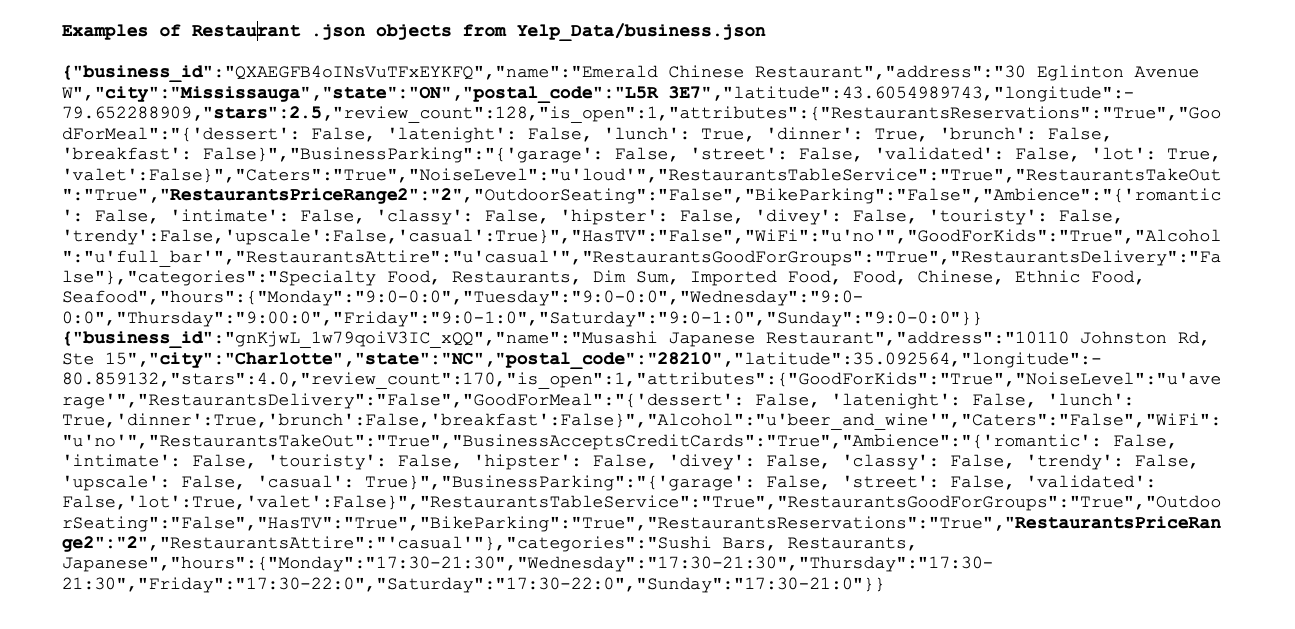

Zillow Zestimate Value Index: 
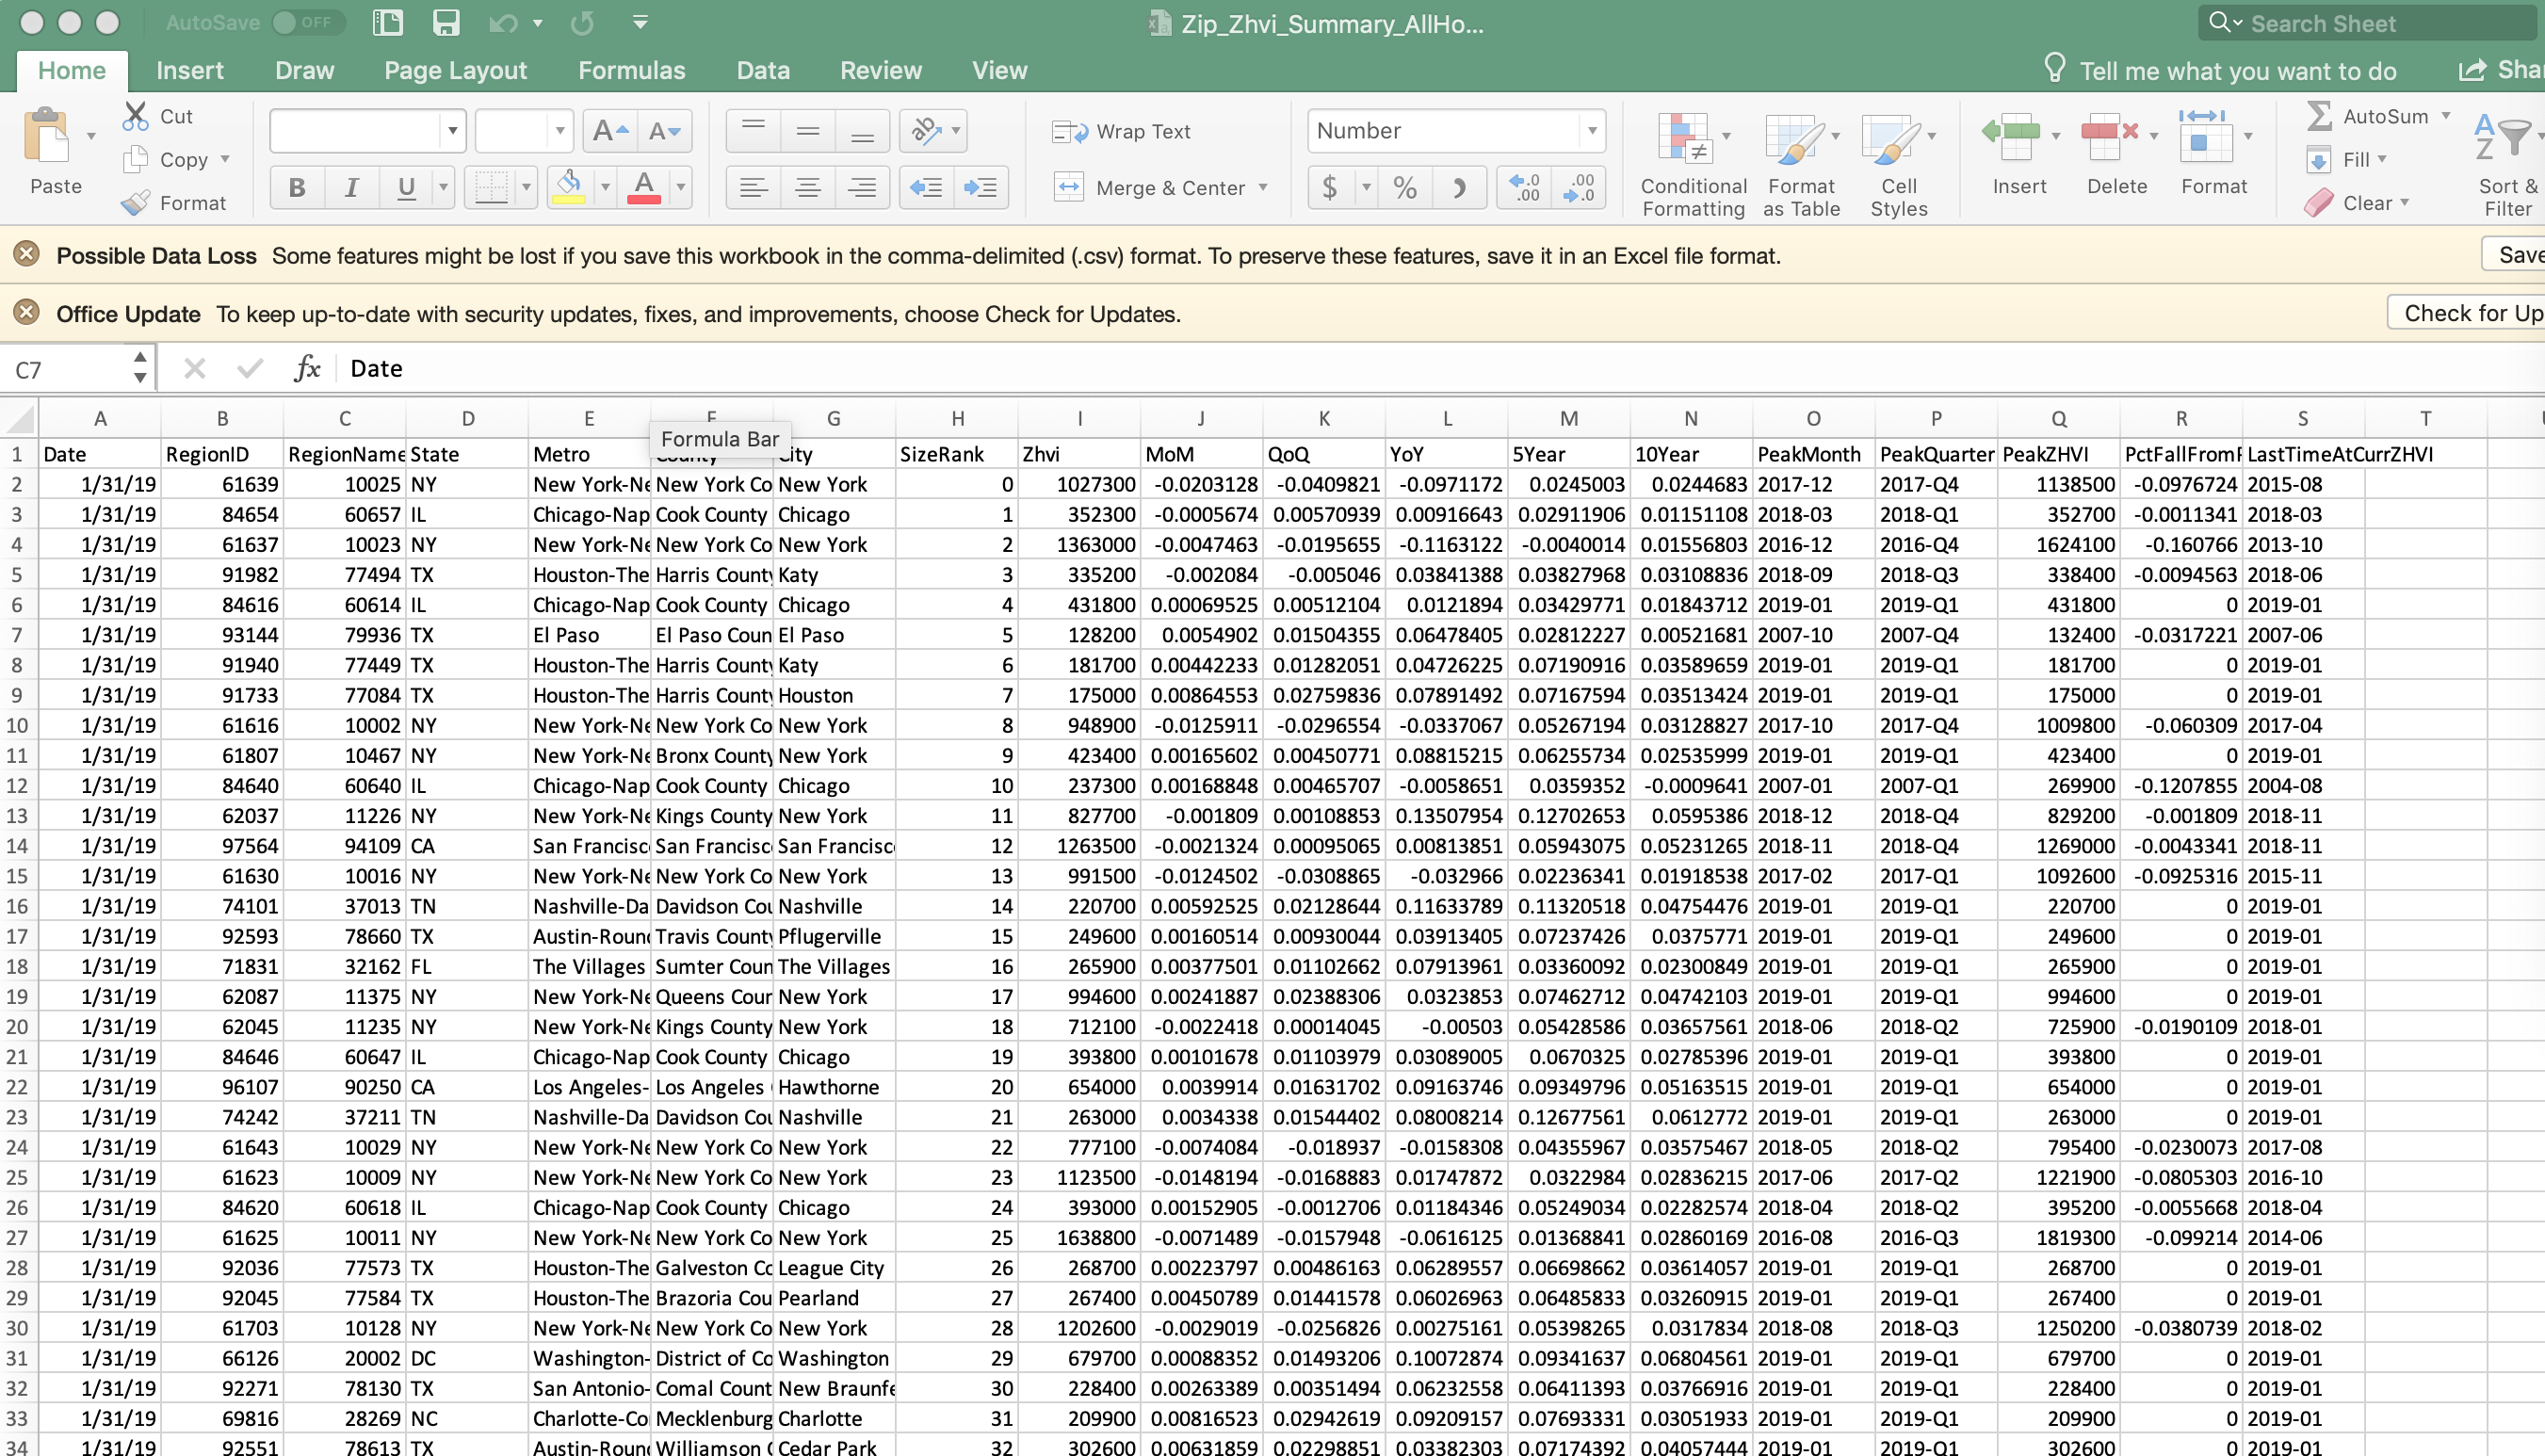

IRS Data:
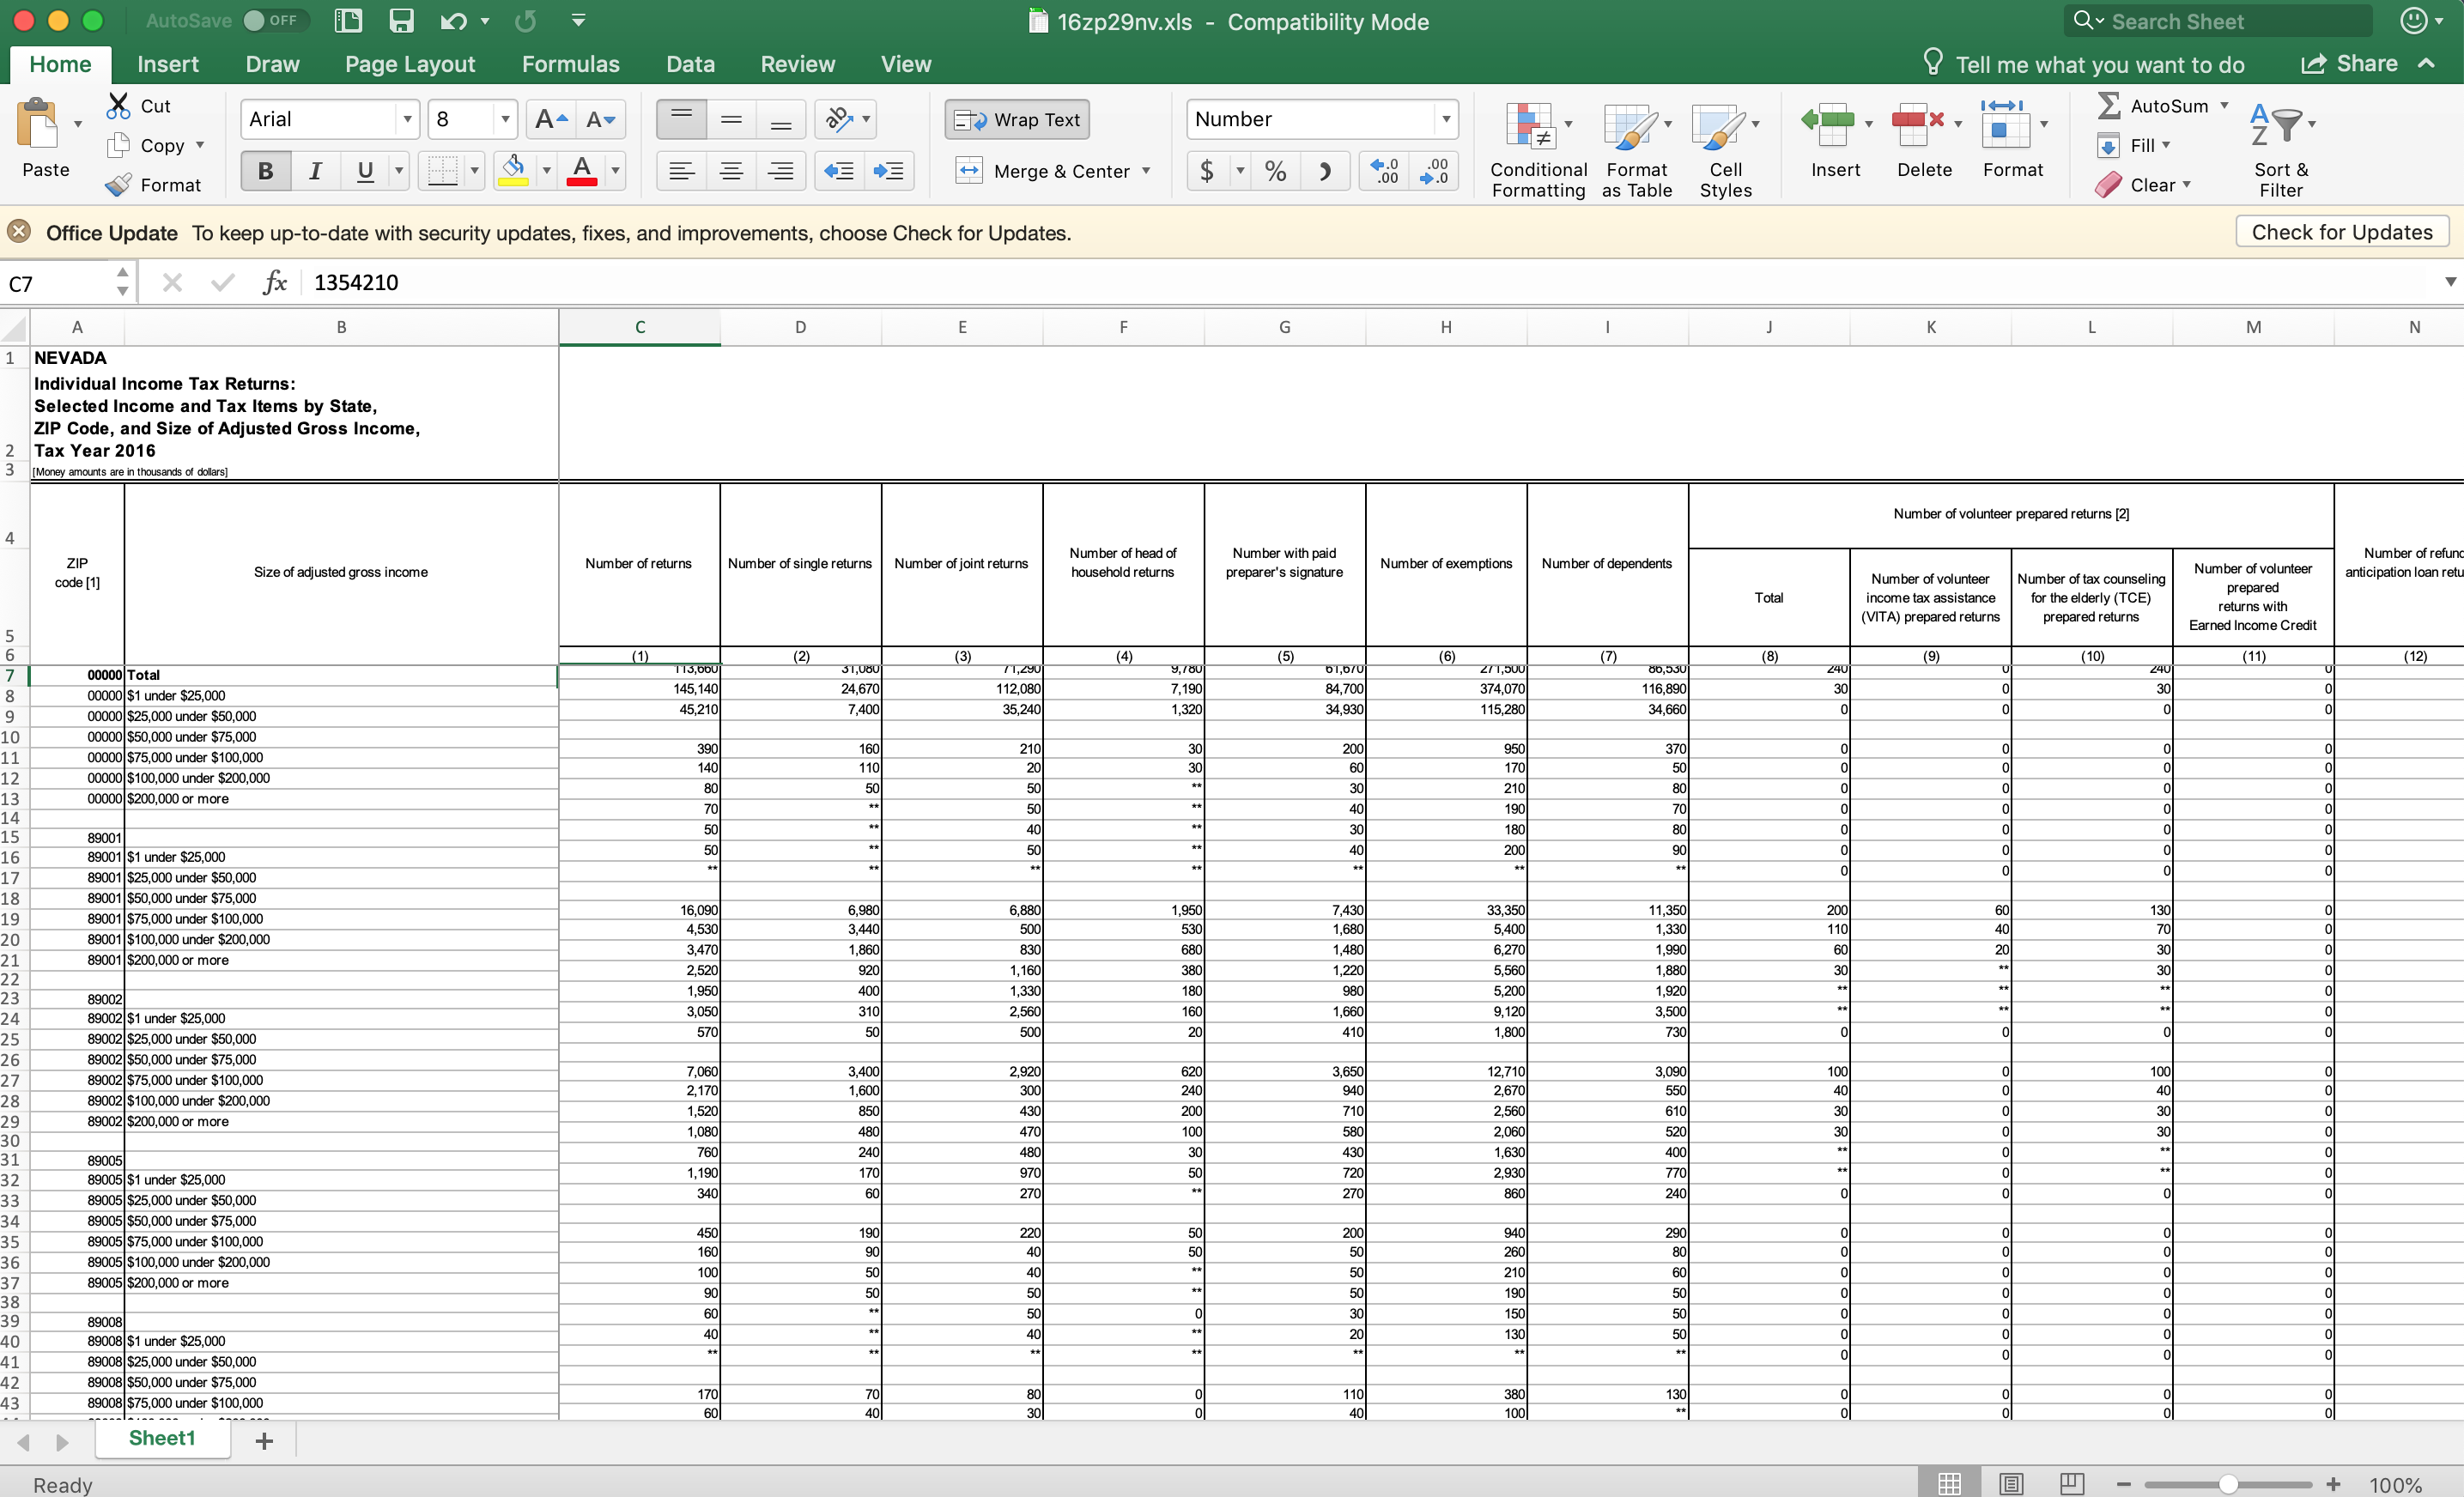